XOR Output:
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0


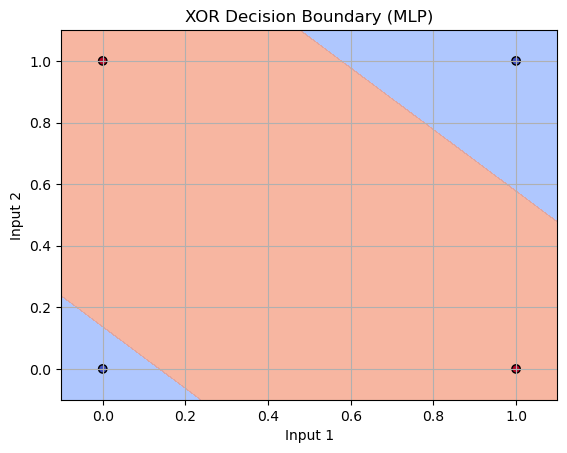

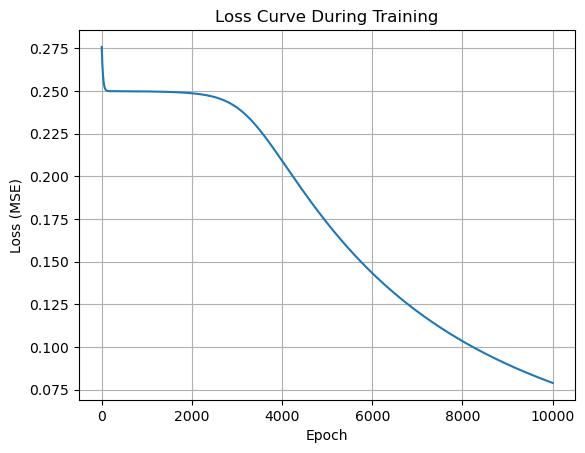

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# XOR input and output
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

Y = np.array([[0],
              [1],
              [1],
              [0]])

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights
np.random.seed(0)
W1 = np.random.rand(2, 2)   # input to hidden
W2 = np.random.rand(2, 1)   # hidden to output

losses = []  # to store loss values

# Training
for i in range(10000):
    # Forward
    Z1 = np.dot(X, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Compute loss (Mean Squared Error)
    loss = np.mean((Y - A2) ** 2)
    losses.append(loss)

    # Backward
    error = Y - A2
    dA2 = error * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dA2)

    dA1 = np.dot(dA2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dA1)

    # Update
    W2 += dW2 * 0.1
    W1 += dW1 * 0.1

# Final predictions
print("XOR Output:")
final_output = sigmoid(np.dot(sigmoid(np.dot(X, W1)), W2))
for i in range(4):
    print(f"{X[i]} -> {round(final_output[i][0])}")

# Plot decision boundary
def plot_decision_boundary():
    h = 0.01
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Forward pass for grid
    hidden = sigmoid(np.dot(grid, W1))
    output = sigmoid(np.dot(hidden, W2))
    zz = output.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], edgecolors='k', cmap="coolwarm")
    plt.title("XOR Decision Boundary (MLP)")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.grid(True)
    plt.show()

# Plot loss curve
def plot_loss_curve():
    plt.plot(losses)
    plt.title("Loss Curve During Training")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.grid(True)
    plt.show()

# Show plots
plot_decision_boundary()
plot_loss_curve()
